<a href="https://colab.research.google.com/github/spinillac11/DeepLearning/blob/main/DL2A_HW1_pytorch_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION to PyTorch

This notebook provides a simple introduction to pytorch, assuming you already know **Python, NumPy** and how to use **Jupyter/Colab** notebooks.

**PyTorch** is a Python library designed for **deep learning**. All calculations rely on one type of a fundamental data structure: the **tensor**. A tensor is a generalization of vectors (1 dimension) and matrices (2 dimensions) to higher dimensions. For instance:

- A set of matrices with the same dimensions forms a 3-dimensinal tensor.
- A colored image consists of 3 matrices (one per chanel: red, blue green), making it a tensor.
- A set of images with the same resolution forms a tensor with 4 dimensions

In deep learning everything is represented as tensors: the input data, model parameters, loss functions, gradients, etc. All computations involve operations on tensors, which makes PyTorch very powerful and flexible library for machine learning.


Machine learning basically relies on three key components:

- **The model:** in this course, the model is a Neural Network, which is represented in pytorch as a **Module**.
- **The loss function:** the model is trained to minimize a loss function, which measures how well it performs.
- **The optimizer:** minimization of the loss function is achieved with gradient descent (or one of its variants) using an **optimizer**.

Moreover, to perform gradient descent, we need to compute the gradient of the loss with respect to the model’s parameters. This is the goal of the so-called **auto-differentiation** which provides efficient computation of these gradients.

In this notbook we will introduce these 3 components, along with PyTorch's basic data structure (the tensors) and the concept of auto-differentiation.


To start with pytorch, here are some external websites:
- http://pytorch.org/tutorials/ : official tutorials
- http://pytorch.org/docs/master/ : official documentation

Before you start, check the version of pytorch!

In [1]:
import torch as th
print(th.__version__)
import matplotlib.pyplot as plt
import torch.nn as nn

2.9.0+cu128


**You should have a version of at least 1.0.0.**


In [3]:
# Need help ?
help(th.arange)


Help on built-in function arange in module torch:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.

    Note: When using floating-point dtypes (especially reduced precision types like ``bfloat16``),
    the results may be affected by floating-point rounding behavior. Some values in the sequence
    might not be exactly representable in certain floating-point formats, which can lead to
    repeated values or unexpected rounding. For precise sequences, it is recommended to use
    integer dtypes instead of floating-point dtypes.

    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsisten

In [2]:
# or
?th.arange

# Tensors

In NumPy or MATLAB, you have several methods to create arrays: `zeros`, `ones`, `arange`, `rand`, `randn`... PyTorch uses analogous functions for creating and manipulating tensors, which you will learn how to use. By using these functions, you can easily create tensors and perform various operations on them. For example, PyTorch offers `torch.zeros`, `torch.ones`, `torch.arange`, `torch.rand`, and `torch.randn` to help you initialize tensors in a manner similar to NumPy or MATLAB.



## 1) Operation and access

### **Do the following:**

- Create a Tensor:

        Build a tensor with dimensions 3×4 that is filled with the numbers from 1 to 12.

- Extract Rows and Columns:

        Extract the first row and the last row of the tensor you built.

        Similarly, extract the first column and the last column.

- Matrix Operations with Random Initialization:

        Create matrix A with dimensions 2×3.

        Create matrix B with dimensions 2×1.

        Create matrix C with dimensions 1×4.

        Concatenate matrices A and B (think about the compatibility of the dimensions!!).

        Add the resulting matrix to C.

- Row Selection:

        Create matrix A with dimensions 5×4.

        Create matrix B with dimensions 3×4, such that B is composed of rows from A in this order: the second row, the first row, and the fourth row.

In [40]:
# -- Build a tensor with dimensions 3×4 that is filled with the numbers from 1 to 12 --

t1 = th.arange(1, 13).view(3, 4)

# First and lats row
t1_irow = t1[0]
t1_frow = t1[-1]

# First and lats column
t1_icol = t1[:, 0]
t1_fcol = t1[:, -1]

print(t1)
print("First row: ", t1_irow)
print("Last row: ", t1_frow)
print("Last col: ", t1_fcol)
print("First col: ", t1_icol)
print("-"*60)

# -- Matrix Operations with Random Initialization --

A = th.randn(2, 3)
B = th.randn(2, 1)
C = th.randn(1, 4)

print("Matrix A:")
print(A)
print("Matrix B:")
print(B)
print("Matrix C:")
print(C)

AB = th.cat((A, B), dim=1) # AB -> (2x4)
print("Concatenate matrices A and B")
print(AB)

ABC = th.cat((AB, C), dim = 0) # ABC -> (3x4)
print("Concatenate matrices AB and C")
print(ABC)
print("-"*60)

# -- Row Selection --

A_s = th.randn(5, 4)
print("Matrix A (5x4): ")
print(A_s)

B_s = A_s[[1, 0, 3],:]
print("Matrix B (3x4): ")
print(B_s)


tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
First row:  tensor([1, 2, 3, 4])
Last row:  tensor([ 9, 10, 11, 12])
Last col:  tensor([ 4,  8, 12])
First col:  tensor([1, 5, 9])
------------------------------------------------------------
Matrix A:
tensor([[ 1.2702,  0.5136, -1.5993],
        [ 0.2152,  0.4869, -0.2587]])
Matrix B:
tensor([[-0.6147],
        [-1.3074]])
Matrix C:
tensor([[-0.3437,  0.3998, -0.7252,  0.6344]])
Concatenate matrices A and B
tensor([[ 1.2702,  0.5136, -1.5993, -0.6147],
        [ 0.2152,  0.4869, -0.2587, -1.3074]])
Concatenate matrices AB and C
tensor([[ 1.2702,  0.5136, -1.5993, -0.6147],
        [ 0.2152,  0.4869, -0.2587, -1.3074],
        [-0.3437,  0.3998, -0.7252,  0.6344]])
------------------------------------------------------------
Matrix A (5x4): 
tensor([[-0.5511, -0.9093, -0.4941, -0.5999],
        [ 1.2916, -0.1930, -0.4017, -0.2070],
        [-0.0115,  1.1786, -0.5055,  1.2938],
        [ 0.4862,  0.2713,  0.1

Look at the following code and how  x2 is built from x. Look at the dimensions of the created tensors.

In [41]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=1)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=2)
print (x2[0])
print (x2.size())


tensor([[-1.8402, -0.7431,  1.0989,  1.0855],
        [-0.7348,  0.6442,  0.9140,  0.9917],
        [ 0.2297,  0.9396,  1.6585, -0.7346],
        [ 0.1387, -0.1714, -1.9556,  0.6839],
        [-0.8833, -0.6185, -0.8690,  0.2048]])
tensor([[-1.8402, -0.7431,  1.0989,  1.0855],
        [-0.7348,  0.6442,  0.9140,  0.9917],
        [ 0.2297,  0.9396,  1.6585, -0.7346],
        [ 0.1387, -0.1714, -1.9556,  0.6839],
        [-0.8833, -0.6185, -0.8690,  0.2048]])
torch.Size([2, 5, 4])
tensor([[-1.8402, -0.7431,  1.0989,  1.0855],
        [-1.8402, -0.7431,  1.0989,  1.0855]])
torch.Size([5, 2, 4])
tensor([[-1.8402, -1.8402],
        [-0.7431, -0.7431],
        [ 1.0989,  1.0989],
        [ 1.0855,  1.0855]])
torch.Size([5, 4, 2])


## 2) Reshape and squeeze

The method `view()` is similar to `reshape` from NumPy. This is **important** since with neural nets, you will often need to manipulate dimensions.

### **Do the following:**

- Build a tensor with dimensions (2, 3, 4).

- Reshape this tensor into two matrices:
    
        One with dimensions (3, 8).
        Another with dimensions (2, 12).

- What does  `view(2,-1)`  do ?

In [51]:
# Build a tensor with dimensions (2, 3, 4).
t_234 = th.arange(1, 25).view(2, 3, 4)
print(t_234)
print("Dimentions:", t_234.shape)
print("-"*60)

# Reshape(3, 8)
t_38 = t_234.view(3, -1)
print("Reshape(3, 8):")
print(t_38)
print("Dimentions:", t_38.shape)
print("-"*60)

# Reshape(2, -1)
t_212 = t_234.view(2, -1)
print("Reshape(2, 12):")
print(t_212)
print("Dimentions:", t_212.shape)
print("-"*60)


tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
Dimentions: torch.Size([2, 3, 4])
------------------------------------------------------------
Reshape(3, 8):
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]])
Dimentions: torch.Size([3, 8])
------------------------------------------------------------
Reshape(2, 12):
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])
Dimentions: torch.Size([2, 12])
------------------------------------------------------------


*What does view(2,-1) do?: view(2, -1) modifies the tensor to have 2 rows. The -1 tells PyTorch to automatically infer the number of columns needed to accommodate the total number of elements.*

Assume you have a Tensor A of dimensions (3,2,1) that you initialized as you want.

### **Do the following:**

- Read the documentation of the method `squeeze`.

- Try it on A.

- Try the reverse with `unsqueeze`.

In [52]:
A = th.randn(3, 2, 1)
print("Tensor A:")
print(A)
print("A dimentions:", A.shape)
print("-"*60)


A_squeezed = A.squeeze()
print("A aqueezed:")
print(A_squeezed)
print("Dimentions:", A_squeezed.shape)
print("-"*60)

A_unsqueezed = A_squeezed.unsqueeze(2)
print("A unsqueezed:")
print(A_unsqueezed)
print("Dimentions", A_unsqueezed.shape)


Tensor A:
tensor([[[-0.6165],
         [-1.4406]],

        [[ 0.2168],
         [ 0.0229]],

        [[-0.6689],
         [-0.1960]]])
A dimentions: torch.Size([3, 2, 1])
------------------------------------------------------------
A aqueezed:
tensor([[-0.6165, -1.4406],
        [ 0.2168,  0.0229],
        [-0.6689, -0.1960]])
Dimentions: torch.Size([3, 2])
------------------------------------------------------------
A unsqueezed:
tensor([[[-0.6165],
         [-1.4406]],

        [[ 0.2168],
         [ 0.0229]],

        [[-0.6689],
         [-0.1960]]])
Dimentions torch.Size([3, 2, 1])


## 3) Automatic differentiation  (auto-grad)

`torch.autograd` provides classes and functions implementing automatic differentiation.
When a tensor is created with `requires_grad=True`, the object will be able to store information about

- *who has created it,*
- *the gradient, if in the future we decide to compute the gradients of some scalar function.*

In the following example, we build a computational graph. The "end" of this graph must be a scalar for automatic differentiation. Look at the following code.



In [49]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)

x: tensor([[0.2955]], requires_grad=True)
x.grad: None


This tensor `x` has an attribute `grad`, which is initially set to `None`. When you perform operations on `x` using PyTorch functions, a computational graph is being built automatically! This graph keeps track of all operations performed on x and any subsequent tensors derived from it.

The function `backward()` can be called on a tensor that contains a scalar. This call computes the gradients (partial derivatives) of the this scalar value with respect to all the tensors that were involved in its computation. Look at the following code:


In [50]:
y = 2*x+1
print(y)
y.backward()
print(x.grad)

tensor([[1.5909]], grad_fn=<AddBackward0>)
tensor([[2.]])


### **Question:**
*Do you agree with the result ?* (check yourself)

y' =  2 ✅

The computational graph can of course be deeper. For instance, we can introduce a new variable `w`, that is a tensor as well.

In [53]:
w = th.randn(1,1, requires_grad=True)
x = th.randn(1, 1, requires_grad=True)

print("w=",w.item()," and x=",x.item())

w= 0.6102722883224487  and x= -0.7821771502494812


In [54]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

tensor([[0.6103]])
tensor([[-0.7822]])


### **Question:**

*What do you think about the result ?*

The result is the partial derivative wich would be $$ \frac{\partial y}{\partial x} = w, \;\; \frac{\partial y}{\partial w} = x$$

It is worth noticing that the gradient is a tensor operation on a scalar value: **we compute the partial derivative of a scalar quantity w.r.t a tensor**. The variable on which we run the `backward()` method must be a scalar.


### **Question:**

Consider the following code: can you explain the results ?

In [55]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
out = 0.5*x.pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x
print("x:",x)            # A simple check. Is it what expected ?

tensor([[2.7491, 1.0570],
        [0.9984, 0.2929]], requires_grad=True)
g: tensor([[2.7491, 1.0570],
        [0.9984, 0.2929]])
x: tensor([[2.7491, 1.0570],
        [0.9984, 0.2929]], requires_grad=True)


The function out is equal to:
$$
out = \sum_{ij} 0.5\cdot x_{ij}^{2}
$$
Taking the gradient:
$$
\nabla(out)_{ij} = 0.5\cdot \frac{\partial}{\partial x_{ij}}x_{ij}^{2} = x_{ij} = \hat{x}
$$
Which is the original tensor


### **Question:**

And can you explain this example  ?

In [56]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(1,2,requires_grad=True)
print(w)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)
print("x.grad:",x.grad)  # the gradient of out with respect to x
print("w:",w)
print("w.grad:",w.grad)  # the gradient of out with respect to x

tensor([[ 0.5482,  0.1537],
        [-0.0488,  1.5667]], requires_grad=True)
tensor([[1., 1.]], requires_grad=True)
x: tensor([[ 0.5482,  0.1537],
        [-0.0488,  1.5667]], requires_grad=True)
x.grad: tensor([[0.4994, 1.7204],
        [0.4994, 1.7204]])
w: tensor([[1., 1.]], requires_grad=True)
w.grad: tensor([[0.5383, 2.6710]])


$w@x = w\cdot x$ is the matrix product which would have dimension (2,1):
$$
\textit{w $\cdot$ x} = \textit{T} \; →  \frac{d (out)}{dT} = \hat{T}
$$
$$
\frac{\partial out}{\partial w} = \frac{\partial out}{\partial T} \frac{\partial T}{\partial w} = (\textit{w $\cdot$ x})x^{T}
$$
$$
\frac{\partial out}{\partial x} = (\frac{\partial T}{\partial x})^{T} \frac{\partial out}{\partial T} = w^{T}(\textit{w $\cdot$ x})
$$

## 4) Linear regression with gradient descent

In this section we focus on linear regression, using synthetic data.

The data are generated with the following code:

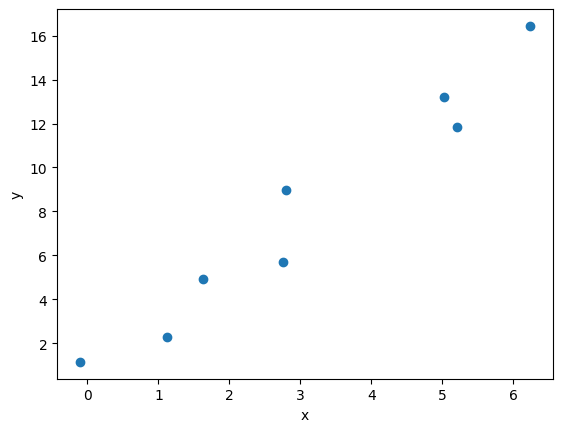

In [2]:
th.manual_seed(123) # to ensure reproducibility
var= 1 #
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5

_ = plt.scatter(X,Y)

_ = plt.xlabel('x')
_ = plt.ylabel('y')

Our goal is to approximate this simple data set with a function $f$ such that
$$
y_i \approx f(x_i).
$$

To find the right set of parameters that define $f$, we want to minimize the mean square error:
$$L = \frac{1}{N} \sum_i^N (f(x_i) - y_i)^2.$$

Our first assumption is that $f$ is a linear function:
$$ f(x) = w\ x+w_0.$$.

The optimization procedure (here: gradient descent) starts with the random initialization of the parameters $(w,w_0)$.

In [3]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

When you plot a linear function $f(x)$ using these randomly chosen parameters $w, w_0$, together with your training points (evaluate the cell belwo), you will see that $f(x)$ does not describe the data very well (or you are very lucky with the random numbers! try again if you are).

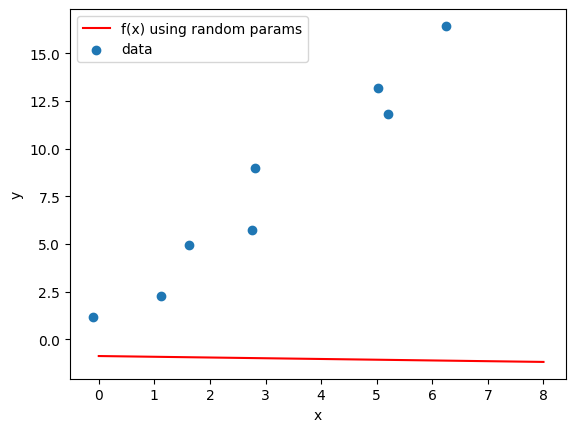

In [4]:
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r', label = 'f(x) using random params')
plt.scatter(X,Y, label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **Do the following:**

Quantify the poor quality of this random initialization by computing the loss function.

In [5]:
# Y prediction
Y_pred = w * X + w0

# Loss function
loss = ((Y_pred - Y).pow(2)).mean()

print(f"Initial parameters: w={w.item():.4f}, w0={w0.item():.4f}")
print(f"Inicial loss: {loss.item():.4f}")


Initial parameters: w=-0.0386, w0=-0.8861
Inicial loss: 109.1224


### **Do the following:**

Use the `backward` function to get the gradient of the loss with respect to the parameters.
- Print the gradients.
- Propose an update of the parameters
- Verify if it improves the loss function

Grad w: -77.06282043457031
Grad w0:  -18.140872955322266
------------------------------------------------------------
w =  0.7320119738578796
w0 =  -0.7046927213668823


/home/spinillac/venvs/hpc/lib/python3.12/site-packages/torch/autograd/graph.py:841: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


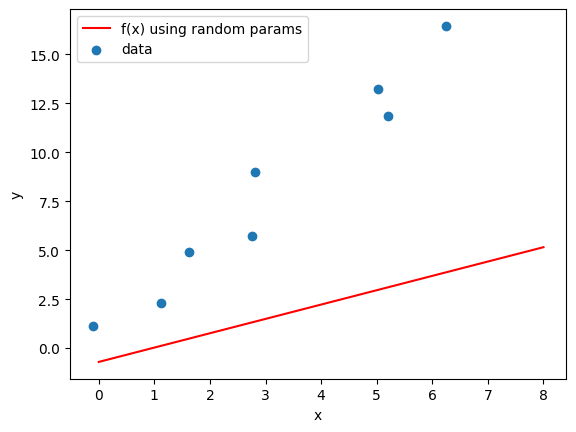

Loss =  55.56619644165039


In [6]:
# -- Print the gradients. --
loss.backward()
print("Grad w:", w.grad.item())
print("Grad w0: ", w0.grad.item())
print("-"*60)

# -- Propose an update of the parameters --

## Similar to a newtowns method we propouse a new w that depends on the decndent gradient##
w = w - 0.01*w.grad
w0 = w0 - 0.01*w0.grad
print("w = ", w.item())
print("w0 = ", w0.item())
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r', label = 'f(x) using random params')
plt.scatter(X,Y, label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# Recalculating the loss function with the new parameters##
loss = ((w*X+w0)-Y).pow(2).mean()
print("Loss = ", loss.item())



## 5) Optimizer and the loss function

The optimizer "takes care" of model parameters update during training. In PyThorch, the base class for all optimizers is `Optimizer`, which is a part of the module `torch.optim`. As you discussed in TD, one commonly used optmizer is Stochastic Gradient Descent `SGD`. Look at the details in its documentation!

In the future, you will also use `Adam`optimizer, but for the moment we are focusing on `SGD`. Note, however, that they all have (more or less) the same interface --- to create an optimizer instance, you need to pass the parameters to be updated and specify the learning rate (lr).


We continue with our concrete problem: to create an optimizer we start by creating an object `SGD` with:

- the parameters under consideration
- the lr parameter,

(see the code below). The parameters we want to learn are `w` and `w0`.

In [7]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = [w,w0]
sgd = th.optim.SGD(trainable_parameters, lr=1)

### **Do the following:**

- Explain the parameter `lr`.

-> The parameter lr tells the model the step that it has to take  in the direcction oposite to the gradient in order to reach the minimum loss. If it is to small it takes more time and if it is to big we can oscilate around the minimum.

The two important functions you will use are:

- `step()` --- This function updates all trainable parameters using their computed gradients (e.g., w.grad and w0.grad).

- `zero_grad()` --- This function resets the gradient values, preparing them for the next training step.


### **Do the following:**
- Compute Predictions:
        
        Compute the predictions for the input data `X`.

- Backward Propagation:
    
        Do the backpropagation and print the values of `w` and `w0` along with their gradients.

- Update Parameters:
   
        Make an update using the optimizer and print the updated values of `w` and `w0` with their gradients.

- Reset Gradients:
    
        Run `zero_grad()` to reset the gradients and print the values of `w` and `w0` with their gradients after resetting.

- Plot the New Line:
        
        Plot the new line defined by the new values of `w` and `w0`.

- Evaluate Learning Rate:
    
        Do you think value of the learning rate `lr` is adapted for this task ?

w =  -0.02832842245697975
Grad w: -62.5345458984375
w0 =  1.4220161437988281
Grad w0:  -13.461153030395508
----- After update:
w =  62.50621795654297
Grad w: -62.5345458984375
w0 =  14.883169174194336
Grad w0:  -13.461153030395508
----- After zero_grad:
w =  62.50621795654297
Grad w: None
w0 =  14.883169174194336
Grad w0:  None


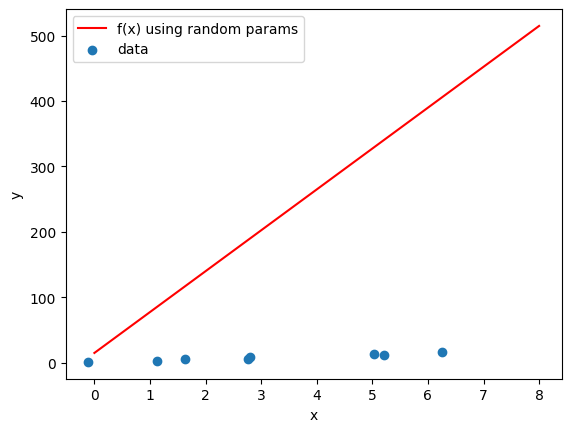

In [8]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = [w,w0]
sgd = th.optim.SGD(trainable_parameters, lr=1)

# Y prediction
Y_pred = w * X + w0

# Loss function
loss = ((Y_pred - Y).pow(2)).mean()

# Do the backpropagation and print the values of `w` and `w0` along with their gradients
loss.backward()
print("w = ", w.item())
print("Grad w:", w.grad.item())
print("w0 = ", w0.item())
print("Grad w0: ", w0.grad.item())

# --  Make an update using the optimizer and print the updated values of `w` and `w0` with their gradients --
sgd.step()
print("----- After update:")
print("w = ", w.item())
print("Grad w:", w.grad.item())
print("w0 = ", w0.item())
print("Grad w0: ", w0.grad.item())

# --  Run `zero_grad()` to reset the gradients
sgd.zero_grad()
print("----- After zero_grad:")
print("w = ", w.item())
print("Grad w:", w.grad)
print("w0 = ", w0.item())
print("Grad w0: ", w0.grad)

# --  Plot the new line defined by the new values of `w` and `w0`
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r', label = 'f(x) using random params')
plt.scatter(X,Y, label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



**The Lr is too big for the task, it goes pass the optimal value of the loss function**

Many loss functions are already implemented in PyTorch (see https://pytorch.org/docs/stable/nn.html#loss-functions for the full list). In our lab sessions we will focus on:

- `MSELoss` for regression
- `BCELoss` for binary classification
- `CrossEntropyLoss` and `NLLLoss` for multiclass classification


- Read the documentation of these losses and apply the `MSELoss` to the prediction for `X`
- Repeat all the steps from the previous TODO list and include a calculation of the `MSELoss`.


## 6) The training function

Now you have everything to write the training code of the model!


### **Do the following:**

- Initialize the model parameters before the training begins.

- Perform SGD in a loop: iterate over multiple epochs, updating parameters using the optimizer.

- Record how the loss evolves after each epoch.

- Plot the loss evolution during the training process.

- Plot the new decision boundary and observe how it changed during training.


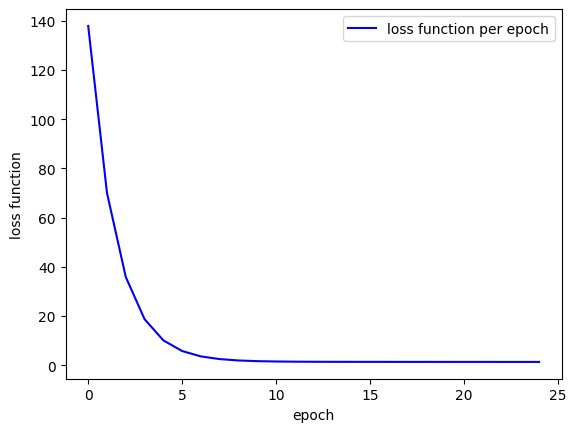

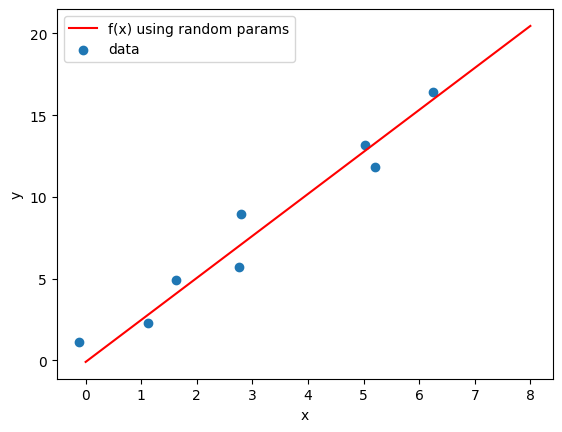

In [9]:
Nepoch = 25
lr = 1e-2

w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = [w,w0]
sgd = th.optim.SGD(trainable_parameters, lr=lr)

loss_fn = nn.MSELoss()

loss_rec = [] # Record loss function

for epoch in range(Nepoch):
  Y_pred = w * X + w0
  loss = loss_fn(Y_pred, Y)
  loss_rec.append(loss.item())
  sgd.zero_grad()
  loss.backward()
  sgd.step()

plt.plot(loss_rec, 'b', label = "loss function per epoch")
plt.xlabel('epoch')
plt.ylabel('loss function')
plt.legend()
plt.show()

# --  Plot the new line defined by the new values of `w` and `w0`
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r', label = 'f(x) using random params')
plt.scatter(X,Y, label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## 7) Module

In the previous section we coded our linear model "by hand". In practice, it is more convenient to use existing modules (base class `Module`). For instance the linear transform $f(x) = wx+w_0$ is simply the application of a so-called `Linear` module.

### **Do the following:**

- Look at the documentation

- Rewrite the training code such that it uses a `Linear` module.

- Look at the result.

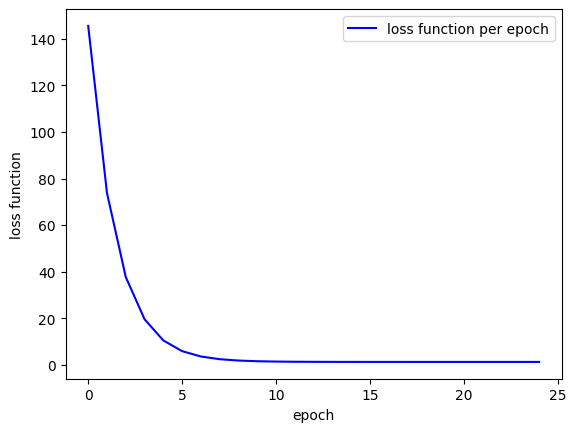

w =  2.382298469543457
w0 =  0.729909360408783


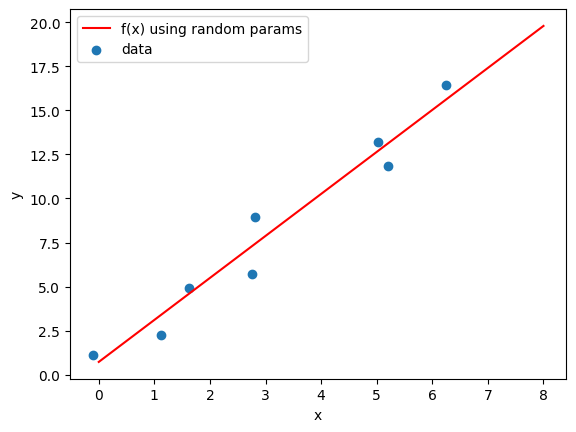

In [117]:
Nepoch = 25
lr = 1e-2
# --Model--
model = nn.Linear(1,1) # recives T(8 x 1)
X_new = X.view(8, 1)
Y_new = Y.view(8, 1)

sgd = th.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
loss_rec = []

for epoch in range(Nepoch):
  Y_pred = model(X_new)
  loss = loss_fn(Y_pred, Y_new)
  loss_rec.append(loss.item())
  sgd.zero_grad()
  loss.backward()
  sgd.step()

plt.plot(loss_rec, 'b', label = "loss function per epoch")
plt.xlabel('epoch')
plt.ylabel('loss function')
plt.legend()
plt.show()

# --  Plot the new line defined by the new values of `w` and `w0`
w_model = model.weight.data.item()
print("w = ", w_model)
w0_model = model.bias.data.item()
print("w0 = ", w0_model)
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w_model*xs+w0_model).detach(),'r', label = 'f(x) using random params')
plt.scatter(X,Y, label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## 8) Logistic Regression

Let start with an easy dataset for binary classification. The following subsections just provide a synthetic dataset and a function to visualize it.



### 8.1)  Create the data


In [12]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2
Xstudents = np.concatenate((ST1,ST2),axis=1)
Ystudents = np.ones(14)
Ystudents[7:] = 0



### **Do the following:**

- Plot the dataset with two colors (one for each class).


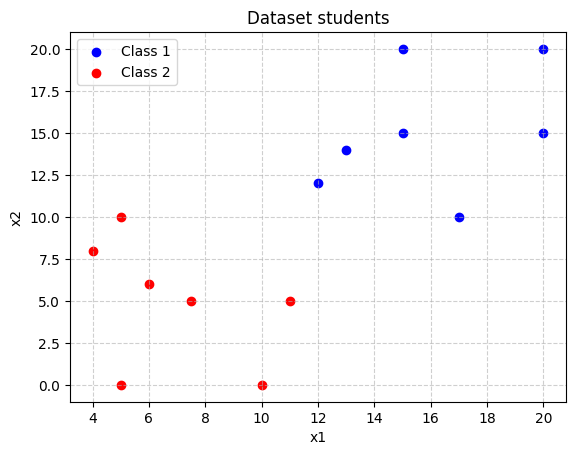

In [13]:
plt.scatter(Xstudents[0, 0:7], Xstudents[1, 0:7], c='blue', label='Class 1')
plt.scatter(Xstudents[0, 7:], Xstudents[1, 7:], c='red', label='Class 2')
plt.title("Dataset students")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 8.2) The model


In this section, you will define, train, and visualize a logistic regression model using PyTorch.


The roadmap is:

- Convert Data to Tensors:

        As explained PyTorch models utilises Tensor objects. Make sure that your dataset is converted into PyTorch tensors before training.

- Create the Logistic Regression Model:

        Use `torch.nn.Sequential` to define a simple neural model. The model should consist of a single neuron with a logistic activation function (i.e., a linear layer followed by a sigmoid function).

- Define the Optimizer:

        Take the basic Stochastic Gradient Descent (SGD) as the optimization algorithm.

- Define the Objective (Loss) Function

- Train the Model:

        Implement a training loop that iterates until convergence. It can be useful to play with different learning rates to observe their effects. Perform gradient descent step-by-step, updating the model parameters after each example.

- Look at the solution:

        Visualize the decision boundary and check how well the model has learned.

- Train in Batch Mode:

        Start again in **batch** mode -- instead of updating the model after each example, compute gradients using the entire training set.


### **Do all the things in the list above**

#### From data to tensors / variables


In [22]:
# Changing to Pytorch tensor
X = th.tensor(Xstudents.T) #T(14, 2)
Y = th.tensor(Ystudents)

print(X)
print(Y)

tensor([[17.0000, 10.0000],
        [12.0000, 12.0000],
        [13.0000, 14.0000],
        [15.0000, 15.0000],
        [15.0000, 20.0000],
        [20.0000, 15.0000],
        [20.0000, 20.0000],
        [ 4.0000,  8.0000],
        [ 7.5000,  5.0000],
        [10.0000,  0.0000],
        [11.0000,  5.0000],
        [ 5.0000,  0.0000],
        [ 5.0000, 10.0000],
        [ 6.0000,  6.0000]], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)


#### Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model.

In [19]:
# The model
D_in=2  # input size : 2
D_out=1 # output size: one value

model = nn.Sequential(nn.Linear(D_in, D_out), nn.Sigmoid())

# The loss
loss_fn = nn.BCELoss()

# The optimizer
optimizer = th.optim.SGD(model.parameters())

#### Testing the model with data
You can run inference to see if everything is fine.


In [20]:
# With a single input vector
prediction = model(X[0]) # or prediction = model.forward(X[0]) both are equivalent

print("For the first input: ",prediction)

# With 3 input vectors
prediction = model(X[0:3])
print("For the 3 first inputs: ",prediction)

# For the whole dataset
prediction = model(X)
print("For all: ",prediction)



RuntimeError: expected m1 and m2 to have the same dtype, but got: double != float

In [ ]:
# With a single input vector
prediction = model(X[0])
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



This code should generate a warning or an error, since the label (or target value) and the prediction (considered as the input value of the loss) are of different dimensions.

There is two ways to fix this. The first one is to reduce the input dimension using `squeeze`. The second one is to modify the target values. See the two cells below.

In [ ]:
prediction = model(X[0]).squeeze()
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



In [ ]:
prediction = model(X[0])
Ymodified = Y.view(-1,1)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Ymodified[0], Ymodified[0].shape)

loss_fn(prediction,Ymodified[0])


#### Training loop


In [ ]:
## Your code here


It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it.

####  Plot the solution

In [ ]:
## Your code here


#### Explore the "solution"

Here, we look at the different wrapping steps:
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [ ]:
mod = model[0]
print(type(mod))
print(type(mod.bias))
print(type(mod.bias.data))
print(type(mod.bias.data.numpy()))


We can look at the parameters:

In [ ]:
print(mod.bias.data.view(1,1))
print(mod.weight.data)

#### Impact of the learning rate

Now, we will use the same model, but trained with a different learning rate. The training process restarts from scratch. We need to therefore re-create the model and the associated optimizer.

In [ ]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()
)
learning_rate = 1e-1
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate)

Now that we have the model, with randomly initialized parameters, we can train it using a different learning rate --- a larger one.

#### **Do the following:**

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ?
- Try the same thing with a learning rate of 0.5, what do you observe ?



In [ ]:
## Your code here